# The Phillips Curve - Spearman's Rank Correlation Analysis

## Introduction
The Phillips curve states that inflation and unemployment have an inverse relationship - higher inflation is associated with lower unemployment and vice versa. The purpose of this analysis is to investigate this among the countries in the world.

## Methodology
The following steps were taken:
- Downloading CSV files containing inflation rate and unemployment rate data for the years 1999-2023 from the official World Bank Group webpage
- Cleaning the data and dropping countries with NaN values
- Merging datasets into one dataframe to facilitate comprehensive analysis with Spearman's rank correlation coefficient and p-value computed 
- Visualizing and presenting the data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import plotly.graph_objects as go
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing and cleaning the data

In [2]:
df_inf = pd.read_csv('inflation.csv', skipfooter=54, engine='python')
df_code = df_inf[['Country Name', 'Country Code']]

In [3]:
df_inf.drop(columns=['Series Name', 'Series Code', 'Country Code'], inplace=True)

In [4]:
cols = list(map(lambda x: x[:4], df_inf.columns[1:]))
df_inf.columns = ['Country Name'] + cols

In [5]:
df_inf.set_index('Country Name', drop=True, inplace=True)

In [6]:
df_inf = df_inf.T
df_inf.head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1999,..,0.389437653561617,2.64551113392799,..,..,248.195902412868,1.12128789571146,..,0.648245760470385,2.28037198258753,...,5.65868803927908,..,1.99897488467452,..,4.11710235771736,..,5.54439180368747,8.66021949364346,26.7876966790029,..
2000,..,0.0500181363468309,0.339163189071768,..,..,324.996871601321,0.77177979690018,..,-0.790883768934757,4.04402131190513,...,4.76382472733251,..,2.53768844221106,..,-1.71033727851109,..,2.79819892435758,4.58999999999981,26.0304117888121,..
2001,..,3.10758827031434,4.22598834854673,..,..,152.561022469299,1.40279663573988,..,3.1459046468502,2.88360430316264,...,4.3593406521727,..,3.57755452095074,..,-0.43154451172818,..,1.22278475878898,11.9115912929855,21.3937821792546,..
2002,..,7.77052583431552,1.41830192345051,..,..,108.897436089429,2.40765801293491,..,1.06004929341667,3.31524678585423,...,13.9724725913515,..,1.96356754199195,..,3.83082838168467,..,5.70951585976626,12.2385339389711,22.2333446430947,..
2003,..,0.48400261181847,4.268953958395,..,..,98.2241436573304,1.99353055152454,..,4.7215533660534,3.65636507938418,...,19.3797301743995,..,3.01624129930394,..,3.23464817293927,..,4.40303221730888,10.8323607023242,21.4015783901995,..


In [7]:
df_inf.index.names = ['Year']

In [8]:
df_inf.replace({'..':np.nan}, inplace=True)
df_inf.isna().sum()

Country Name
Afghanistan              10
Albania                   1
Algeria                   0
American Samoa           25
Andorra                  25
                         ..
Virgin Islands (U.S.)    25
West Bank and Gaza        0
Yemen, Rep.               9
Zambia                    0
Zimbabwe                 12
Length: 217, dtype: int64

In [9]:
df_inf.drop_duplicates(inplace=True)

In [10]:
cols_inf = map(lambda x: x + '_INF', df_inf.columns)
df_inf.columns = cols_inf
df_inf.head()

,Afghanistan_INF,Albania_INF,Algeria_INF,American Samoa_INF,Andorra_INF,Angola_INF,Antigua and Barbuda_INF,Argentina_INF,Armenia_INF,Aruba_INF,...,Uruguay_INF,Uzbekistan_INF,Vanuatu_INF,"Venezuela, RB_INF",Viet Nam_INF,Virgin Islands (U.S.)_INF,West Bank and Gaza_INF,"Yemen, Rep._INF",Zambia_INF,Zimbabwe_INF
Year,,,,,,,,,,,,,,,,,,,,,
1999,NaN,0.389437653561617,2.64551113392799,NaN,NaN,248.195902412868,1.12128789571146,NaN,0.648245760470385,2.28037198258753,...,5.65868803927908,NaN,1.99897488467452,NaN,4.11710235771736,NaN,5.54439180368747,8.66021949364346,26.7876966790029,NaN
2000,NaN,0.0500181363468309,0.339163189071768,NaN,NaN,324.996871601321,0.77177979690018,NaN,-0.790883768934757,4.04402131190513,...,4.76382472733251,NaN,2.53768844221106,NaN,-1.71033727851109,NaN,2.79819892435758,4.58999999999981,26.0304117888121,NaN
2001,NaN,3.10758827031434,4.22598834854673,NaN,NaN,152.561022469299,1.40279663573988,NaN,3.1459046468502,2.88360430316264,...,4.3593406521727,NaN,3.57755452095074,NaN,-0.43154451172818,NaN,1.22278475878898,11.9115912929855,21.3937821792546,NaN
2002,NaN,7.77052583431552,1.41830192345051,NaN,NaN,108.897436089429,2.40765801293491,NaN,1.06004929341667,3.31524678585423,...,13.9724725913515,NaN,1.96356754199195,NaN,3.83082838168467,NaN,5.70951585976626,12.2385339389711,22.2333446430947,NaN
2003,NaN,0.48400261181847,4.268953958395,NaN,NaN,98.2241436573304,1.99353055152454,NaN,4.7215533660534,3.65636507938418,...,19.3797301743995,NaN,3.01624129930394,NaN,3.23464817293927,NaN,4.40303221730888,10.8323607023242,21.4015783901995,NaN


In [11]:
df_unemp = pd.read_csv('unemp_rate.csv', encoding='latin')

In [12]:
df_unemp[df_unemp['Country Name'] == 'Zimbabwe'].index[0]

216

In [13]:
df_unemp = df_unemp.iloc[:217,]
df_unemp.drop(columns=['Series Name', 'Series Code', 'Country Code'], inplace=True)

cols = list(map(lambda x: x[:4], df_unemp.columns[1:]))
df_unemp.columns = ['Country Name'] + cols

df_unemp.set_index('Country Name', drop=True, inplace=True)

df_unemp = df_unemp.T

df_unemp.index.names = ['Year']

df_unemp.replace({'..':np.nan}, inplace=True)

df_unemp.drop_duplicates(inplace=True)

In [14]:
cols_unemp = map(lambda x: x + '_UNEMP', df_unemp.columns)
df_unemp.columns = cols_unemp
df_unemp.head()

,Afghanistan_UNEMP,Albania_UNEMP,Algeria_UNEMP,American Samoa_UNEMP,Andorra_UNEMP,Angola_UNEMP,Antigua and Barbuda_UNEMP,Argentina_UNEMP,Armenia_UNEMP,Aruba_UNEMP,...,Uruguay_UNEMP,Uzbekistan_UNEMP,Vanuatu_UNEMP,"Venezuela, RB_UNEMP",Viet Nam_UNEMP,Virgin Islands (U.S.)_UNEMP,West Bank and Gaza_UNEMP,"Yemen, Rep._UNEMP",Zambia_UNEMP,Zimbabwe_UNEMP
Year,,,,,,,,,,,,,,,,,,,,,
1999,7.953,20.835,28.545,NaN,NaN,16.392,NaN,14.05,11.2,NaN,...,10.466,13.3,8.352,14.53,2.33,10.869,10.351,11.46,12.496,6
2000,7.955,19.023,29.77,NaN,NaN,16.502,NaN,15,11.097,NaN,...,12.627,12.286,8.321,13.99,2.26,10.469,10.625,11.561,12.93,5.682
2001,7.958,18.57,27.3,NaN,NaN,16.539,NaN,17.32,10.995,NaN,...,15.052,11.254,8.47,13.04,2.76,10.583,21.493,11.725,13.41,5.314
2002,7.939,17.891,25.9,NaN,NaN,16.342,NaN,19.59,10.872,NaN,...,16.648,10.224,8.654,16.17,2.12,10.817,27.465,11.842,14.125,5.007
2003,7.922,16.985,23.72,NaN,NaN,16.37,NaN,15.36,10.757,NaN,...,16.661,9.185,8.71,16.78,2.25,11.119,23.004,12.013,14.701,4.736


In [15]:
df_all = pd.concat([df_inf, df_unemp], axis=1, sort=True)
df_all = df_all[sorted(df_all.columns)]
df_all.head()

,Afghanistan_INF,Afghanistan_UNEMP,Albania_INF,Albania_UNEMP,Algeria_INF,Algeria_UNEMP,American Samoa_INF,American Samoa_UNEMP,Andorra_INF,Andorra_UNEMP,...,Virgin Islands (U.S.)_INF,Virgin Islands (U.S.)_UNEMP,West Bank and Gaza_INF,West Bank and Gaza_UNEMP,"Yemen, Rep._INF","Yemen, Rep._UNEMP",Zambia_INF,Zambia_UNEMP,Zimbabwe_INF,Zimbabwe_UNEMP
Year,,,,,,,,,,,,,,,,,,,,,
1999,NaN,7.953,0.389437653561617,20.835,2.64551113392799,28.545,NaN,NaN,NaN,NaN,...,NaN,10.869,5.54439180368747,10.351,8.66021949364346,11.46,26.7876966790029,12.496,NaN,6
2000,NaN,7.955,0.0500181363468309,19.023,0.339163189071768,29.77,NaN,NaN,NaN,NaN,...,NaN,10.469,2.79819892435758,10.625,4.58999999999981,11.561,26.0304117888121,12.93,NaN,5.682
2001,NaN,7.958,3.10758827031434,18.57,4.22598834854673,27.3,NaN,NaN,NaN,NaN,...,NaN,10.583,1.22278475878898,21.493,11.9115912929855,11.725,21.3937821792546,13.41,NaN,5.314
2002,NaN,7.939,7.77052583431552,17.891,1.41830192345051,25.9,NaN,NaN,NaN,NaN,...,NaN,10.817,5.70951585976626,27.465,12.2385339389711,11.842,22.2333446430947,14.125,NaN,5.007
2003,NaN,7.922,0.48400261181847,16.985,4.268953958395,23.72,NaN,NaN,NaN,NaN,...,NaN,11.119,4.40303221730888,23.004,10.8323607023242,12.013,21.4015783901995,14.701,NaN,4.736


In [16]:
columns_to_drop = []

for country in df_all.columns.str.split('_').str[0].unique():
    inf_col = f'{country}_INF'
    unemp_col = f'{country}_UNEMP'
    
    if df_all[[inf_col, unemp_col]].isna().any().any():
        columns_to_drop.extend([inf_col, unemp_col])

df_cleaned = df_all.drop(columns=columns_to_drop)
df_cleaned.head()

,Algeria_INF,Algeria_UNEMP,Angola_INF,Angola_UNEMP,Armenia_INF,Armenia_UNEMP,Australia_INF,Australia_UNEMP,Austria_INF,Austria_UNEMP,...,United Kingdom_INF,United Kingdom_UNEMP,United States_INF,United States_UNEMP,Uruguay_INF,Uruguay_UNEMP,Viet Nam_INF,Viet Nam_UNEMP,Zambia_INF,Zambia_UNEMP
Year,,,,,,,,,,,,,,,,,,,,,
1999,2.64551113392799,28.545,248.195902412868,16.392,0.648245760470385,11.2,1.48312940304041,6.876,0.568993765885568,4.707,...,1.7529508005142,6.042,2.18802719697358,4.219,5.65868803927908,10.466,4.11710235771736,2.33,26.7876966790029,12.496
2000,0.339163189071768,29.77,324.996871601321,16.502,-0.790883768934757,11.097,4.45743514797224,6.288,2.34486285357282,4.694,...,1.18295624210408,5.558,3.37685727149929,3.992,4.76382472733251,12.627,-1.71033727851109,2.26,26.0304117888121,12.93
2001,4.22598834854673,27.3,152.561022469299,16.539,3.1459046468502,10.995,4.40713536201469,6.747,2.65000077279528,4.012,...,1.53234960272418,4.696,2.82617111885407,4.731,4.3593406521727,15.052,-0.43154451172818,2.76,21.3937821792546,13.41
2002,1.41830192345051,25.9,108.897436089429,16.342,1.06004929341667,10.872,2.98157453936348,6.375,1.81035787764127,4.86,...,1.52040245947455,5.037,1.58603162650601,5.783,13.9724725913515,16.648,3.83082838168467,2.12,22.2333446430947,14.125
2003,4.268953958395,23.72,98.2241436573304,16.37,4.7215533660534,10.757,2.73259596616786,5.933,1.35555370896452,4.785,...,1.37650038542013,4.807,2.27009497336115,5.989,19.3797301743995,16.661,3.23464817293927,2.25,21.4015783901995,14.701


## Computing Spearman's rank coefficient and p-value

In [17]:
df_corr = {'Country Name': [],
           'Spearman_corr': [],
           'P_value': []}

countries = df_cleaned.columns.str.split('_').str[0].unique()

In [18]:
for country in countries:
    inf_column = f'{country}_INF'
    unemp_column = f'{country}_UNEMP'
    
    corr, p_value = spearmanr(df_cleaned[inf_column], df_cleaned[unemp_column])
    df_corr['Country Name'].append(country)
    df_corr['Spearman_corr'].append(corr)
    df_corr['P_value'].append(p_value)

In [19]:
df_corr = pd.DataFrame.from_dict(df_corr)
df_corr.sort_values('Spearman_corr', ascending=True, inplace=True)

In [20]:
df_corr.reset_index(drop=True, inplace=True)

In [21]:
df_corr = pd.merge(df_corr, df_code, how='left', on='Country Name')

In [22]:
df_corr = df_corr[['Country Name', 'Country Code', 'Spearman_corr', 'P_value']]
df_corr.head()

,Country Name,Country Code,Spearman_corr,P_value
0,"Hong Kong SAR, China",HKG,-0.796923,0.000002
1,Guyana,GUY,-0.638462,0.000594
2,Switzerland,CHE,-0.620000,0.000947
3,Bolivia,BOL,-0.618462,0.000983
4,Netherlands,NLD,-0.617692,0.001002


## Visualizing the data

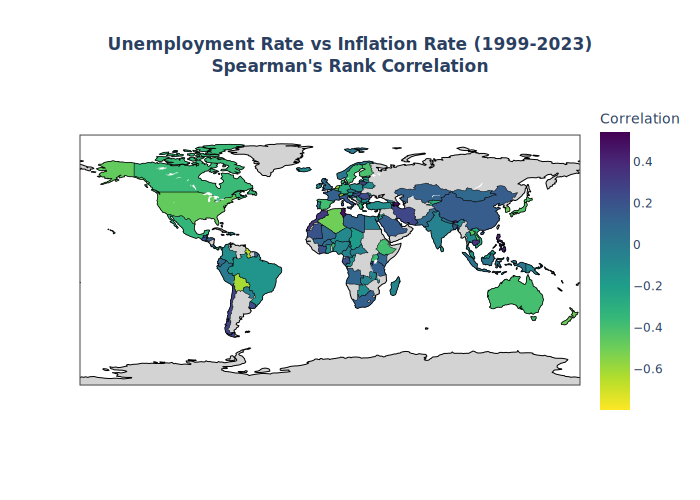

In [23]:
fig = go.Figure(data=go.Choropleth(
    locations = df_corr['Country Code'],
    z = df_corr['Spearman_corr'],
    text = df_corr['Country Name'],
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Correlation'
))

fig.update_layout(title_text="<b>Unemployment Rate vs Inflation Rate (1999-2023)<b><br>Spearman's Rank Correlation", title_x=0.5)

fig.update_traces(
    marker=dict(line=dict(color='black', width=0.5)),
    selector=dict(type='choropleth')
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black",
                showland=True, landcolor="lightgrey")

fig.show("svg")

## Presenting top relationships

In [24]:
df_corr.head(5)

,Country Name,Country Code,Spearman_corr,P_value
0,"Hong Kong SAR, China",HKG,-0.796923,0.000002
1,Guyana,GUY,-0.638462,0.000594
2,Switzerland,CHE,-0.620000,0.000947
3,Bolivia,BOL,-0.618462,0.000983
4,Netherlands,NLD,-0.617692,0.001002


This dataframe presents the results of Spearman's rank correlation analysis for a study on the Phillips curve covering **top 5 negative** correlations among the countries.

- **Hong Kong SAR, China** shows the strongest negative correlation with a very low p-value, indicating high statistical significance
- **Guyana** and **Switzerland** also exhibit strong negative correlations, with significant p-values
- **Bolivia** and **Netherlands** also show strong negative correlations, with very low p-values

Worth to mention that these countries are known for the diversity and stability of their economy, which may explain the strong negative relationships between studied variables. Therefore, Phillips Curve functions well in the studied period.

In [25]:
df_corr.tail(5)

,Country Name,Country Code,Spearman_corr,P_value
127,Bhutan,BTN,0.430769,0.031580
128,Mauritius,MUS,0.446923,0.025104
129,Azerbaijan,AZE,0.485758,0.013827
130,Tunisia,TUN,0.486923,0.013568
131,Solomon Islands,SLB,0.543181,0.005016


This dataframe presents the results of Spearman's rank correlation analysis for a study on the Phillips curve covering **top 5 positive** correlations among the countries.

- **Solomon Islands** exhibits the strongest but moderate correlation with a signifant p-value
- **Tunisia** and **Azerbaijan** show moderate correlations with low p-values, indicating statisitcal significance
- **Mauritius** and **Bhutan** also show moderate correlations with a very low p-values

The positive correlations indicate that in these countries, inflation and unemployment have tended to move in the same direction from 1999 to 2023. That suggests that both indicators might have increased simultaneously, which is atypical in the context of the traditional Phillips Curve.

These countries' economies are not diverse and they often get hit by global shocks, causing inflation and unemployment to go up together. Also, their instability makes it hard for them to handle problems effectively.